In [ ]:
# Optimal Classfier
# => f* = argmin_f P(error)
#       => f1, f2, ... 함수(모델)의 모양
# regression(linear, logistic) + gradient method(ascent, descent)
# => f* = argmax_Y=y P(Predict(y))
#       => P(y|X) => P(X|y)P(y)[/P(X) => constant]
# Bayes Theorem => Bayes Model

# X = {x1, x2, .. , xi}
# P(X={x1, x2, .. , xi}|y)P(y)
# 특정 조건(y)이 있을 때, {x1, x2, .. , xi} => 서로 독립 => Conditional Indepence => Naive Assumption

# Naive + Bayes Model => 성능?

# Data가 텍스트
# Unigram => Bag Of Words(BoW) => 경제문서1, 경제문서2, ... , 스포츠1 => 검색
# P(A,B) => P(A)P(B)
# P(B,A) => P(A)P(B)
# 금융, 금리, 자산, 부채, ..., 축구, 손흥민, ...
# 경제문서1 = {금융, 자산, ..} => P
# 경제문서2 = {금리, 부채, ..}
# 스포츠1 = {축구, 손흥민, ..} => P

# Ngram => Sequence => 모든 sequence가 필요 => 모델
# P(A,B) => P(B|A)P(A)
# P(B,A) => P(A|B)P(B)

# Linear Regression(선형 회귀)

이 세상의 모든 문제는 선형 관계로 이루어져 있을 것이라고 가정. **기울기**와 **절편**을 찾는 것을 목표로 함. (확률 문제는 아님)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

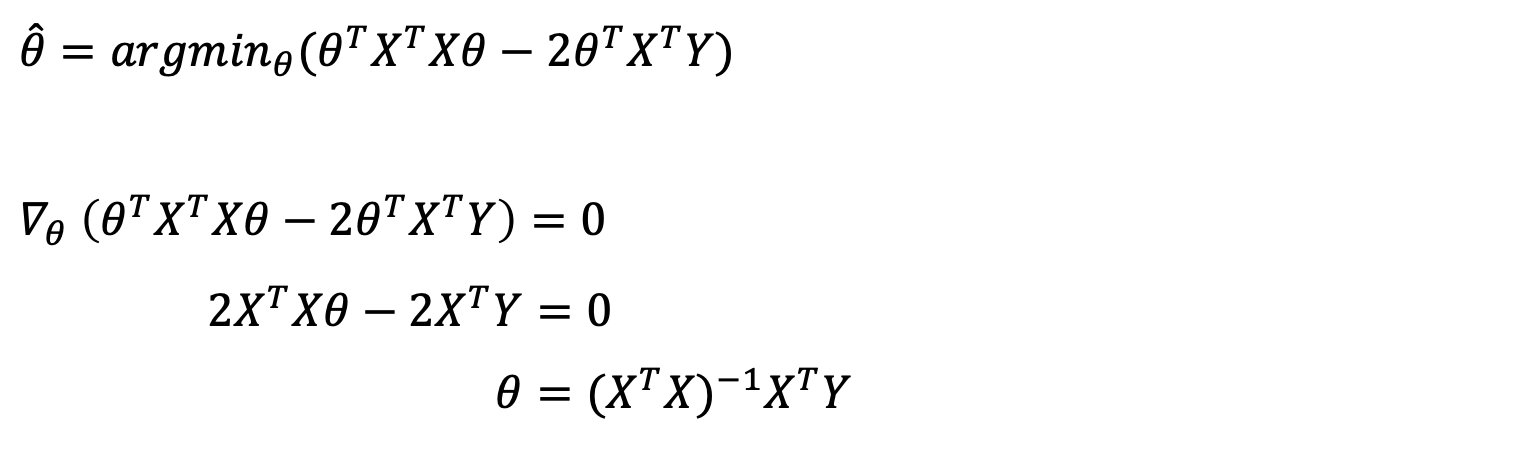

In [23]:
X = np.linspace(0, np.pi, 100)
Y = np.cos(X)

In [24]:
X = np.c_[np.ones(100), X]

In [25]:
theta = np.linalg.inv(X.T@X)@X.T@Y

In [26]:
theta.shape

(2,)

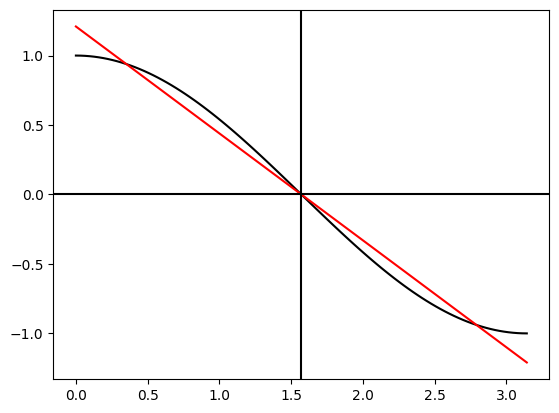

In [27]:
plt.plot(X[:,1],Y, c='k')
plt.plot(X[:,1], X@theta, c='r')
plt.axhline(0, c='k')
plt.axvline(np.pi/2, c='k')

In [28]:
X = np.linspace(0, np.pi, 100)
Y = np.zeros((100,))

In [29]:
Y[np.cos(X) > 0] = 1

In [30]:
X = np.c_[np.ones(100), X]

In [31]:
theta = np.linalg.inv(X.T@X)@X.T@Y

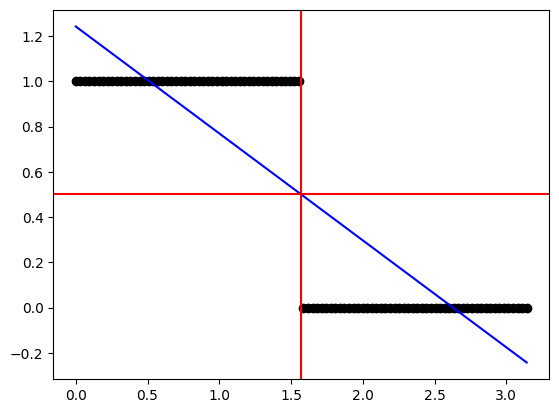

In [32]:
plt.scatter(X[:,1],Y, c='k')
plt.plot(X[:,1], X@theta, c='b')
plt.axhline(0.5, c='r')
plt.axvline(np.pi/2, c='r')

In [33]:
X@theta > .5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [34]:
theta

array([ 1.24257426, -0.47273745])

In [35]:
X = np.linspace(0, np.pi*2, 100) # x1 = 점
Y = np.sin(X)

In [36]:
X1 = np.c_[np.ones(100), X]
X2 = np.c_[X1, np.power(X,2), np.power(X,3), np.power(X,4), np.power(X,5)] # x1 = 벡터

In [ ]:
# X = [0,1,2,3]
# x1 = 0

# np.c_[np.ones(), X]
# X = [[1,0],[1,1],[1,2],[1,3]]
# x1 = [1,0]

# x1 = [1,x,x**2,x**3,...]

In [37]:
theta1 = np.linalg.inv(X1.T@X1)@X1.T@Y
theta2 = np.linalg.inv(X2.T@X2)@X2.T@Y

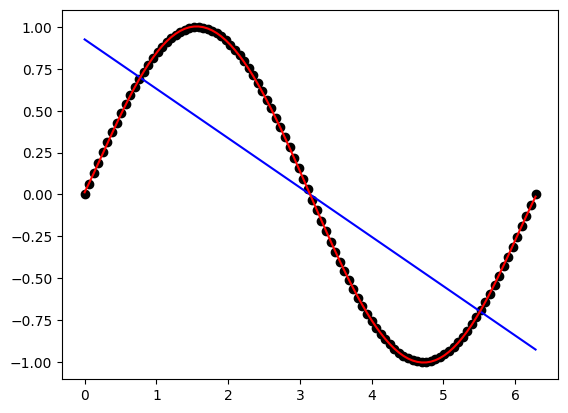

In [38]:
plt.scatter(X,Y, c='k') # 트루 밸류
plt.plot(X, X1@theta1, c='b')
plt.plot(X, X2@theta2, c='r')

In [39]:
X = np.linspace(-np.pi*2, np.pi*4, 300) # x1 = 점
Y = np.sin(X)

In [40]:
X1 = np.c_[np.ones(300), X]
X2 = np.c_[X1, np.power(X,2), np.power(X,3), np.power(X,4), np.power(X,5)] # x1 = 벡터

In [41]:
theta1.shape, theta2.shape

((2,), (6,))

(-6.283185307179586, 6.283185307179586)

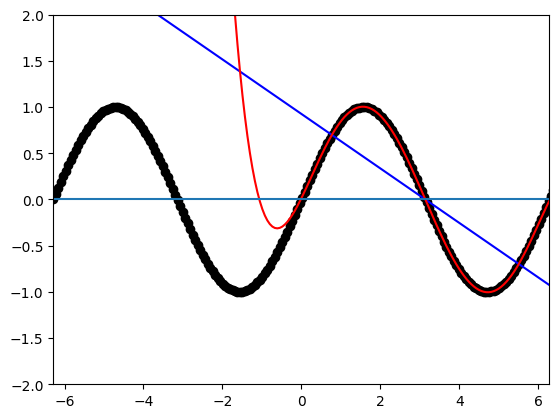

In [42]:
plt.scatter(X,Y, c='k') # 트루 밸류
plt.plot(X, X1@theta1, c='b') # 1차
plt.plot(X, X2@theta2, c='r') # n차
plt.axhline(0) # 상수
plt.ylim(-2, 2)
plt.xlim(-np.pi*2,np.pi*2)
# # 모델 복잡도
# 0차:상수 < 1차 < n차
# # 데이터셋에서의 예측도
# 상수 < 1차 < n차
# # 앞으로의 데이터에서의 에러율
# 상수 < 1차 < n차

# Logistic Regression

Sigmoid Function을 이용해서 Bayes Risk를 줄일 수 있다. (Logistic)

Linear Regression과 같은 방법으로는 풀지 못한다(본인으로 회귀함)

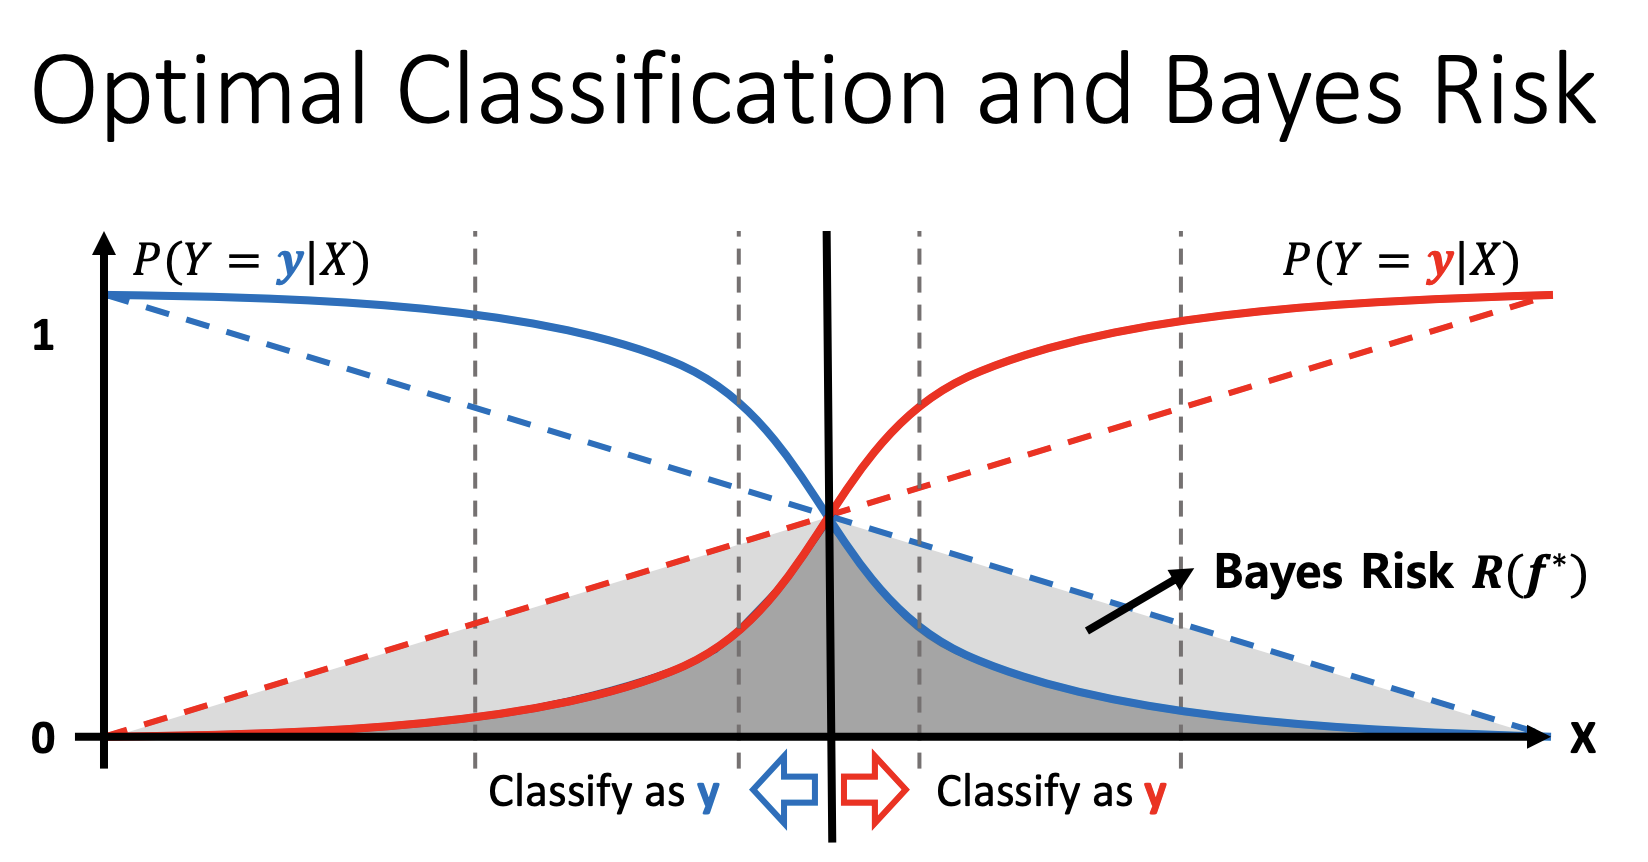

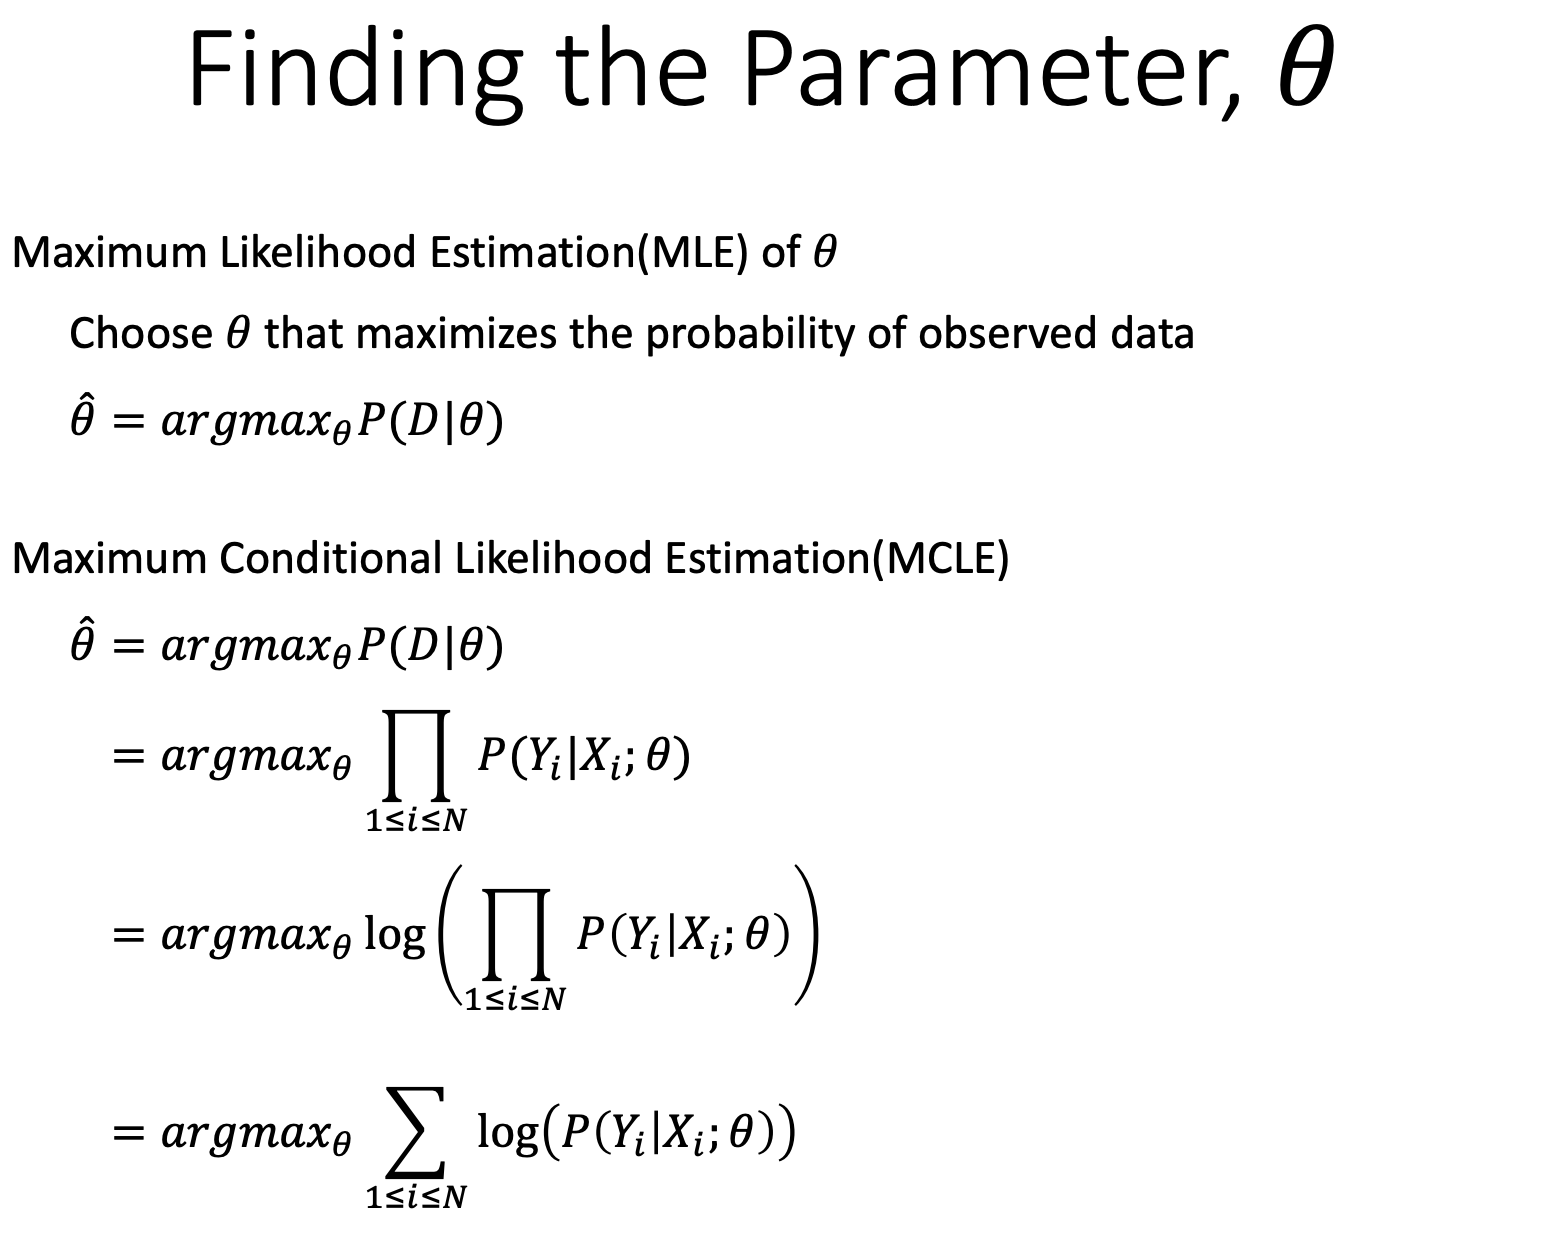

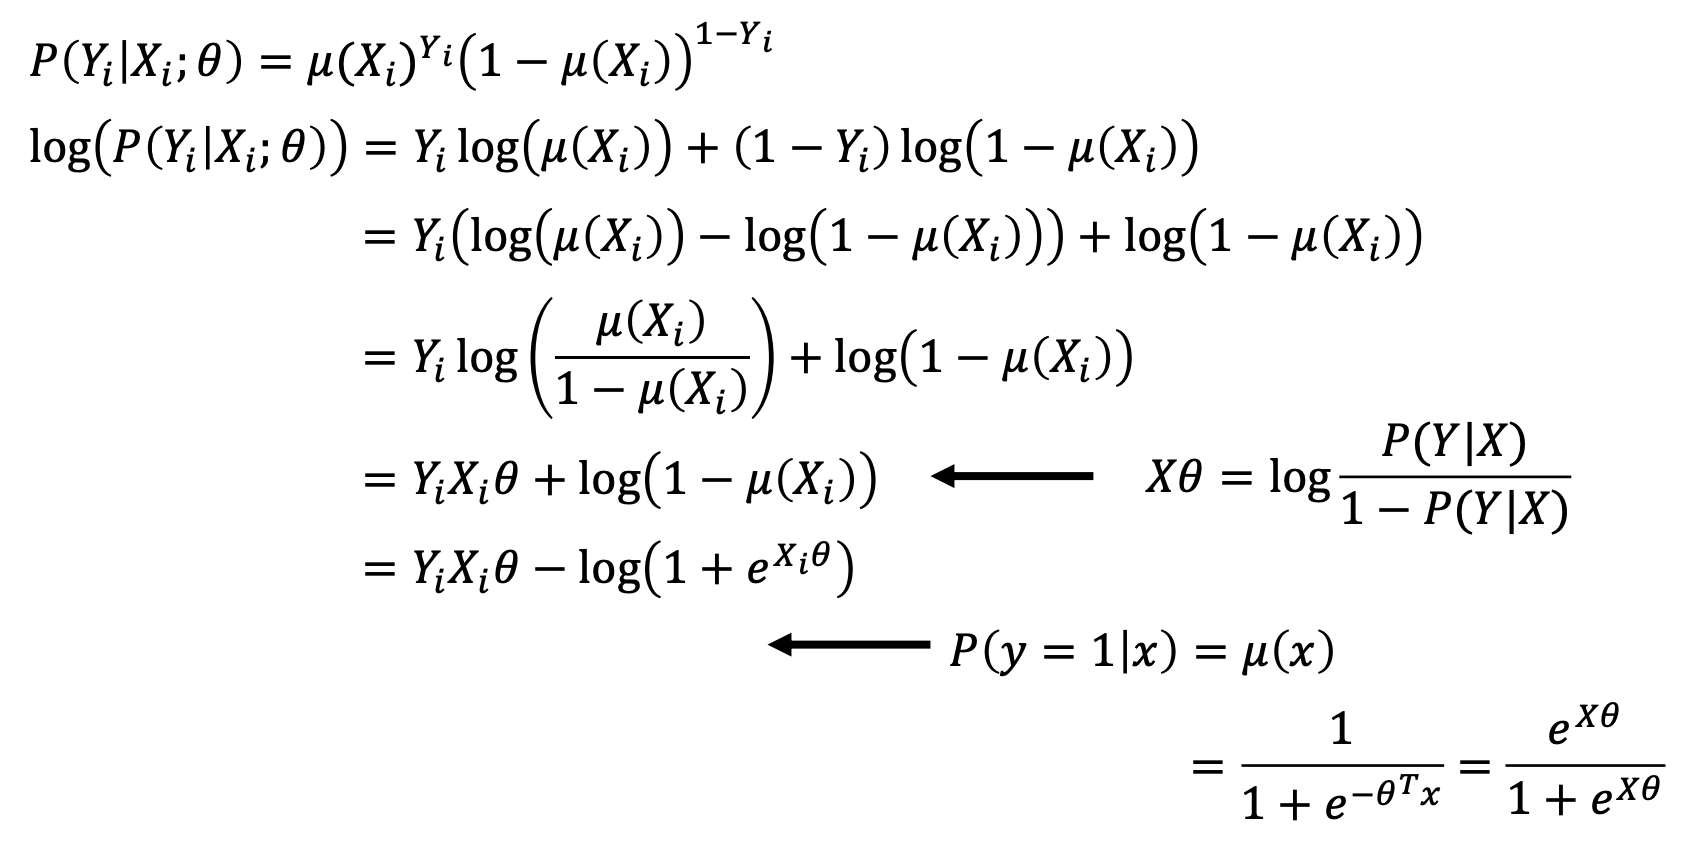

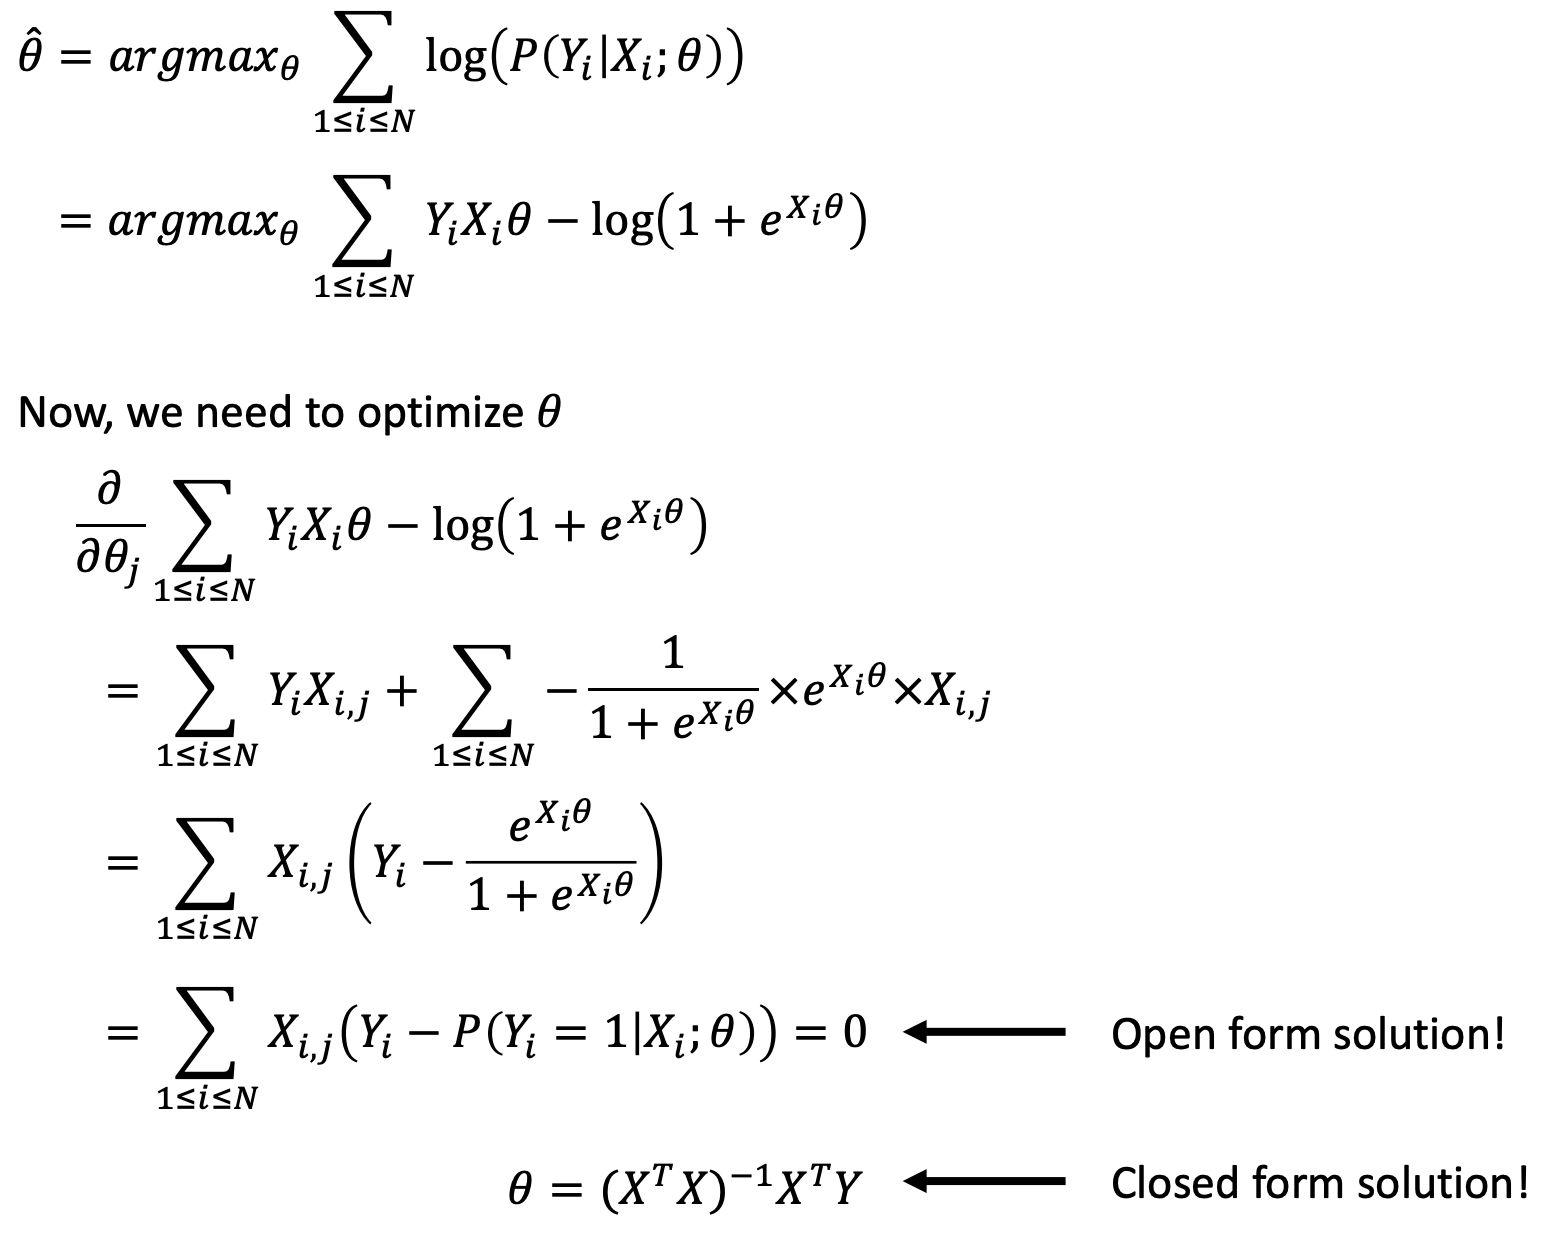

# Gradient Method

## Talpy Series(테일러 급수)

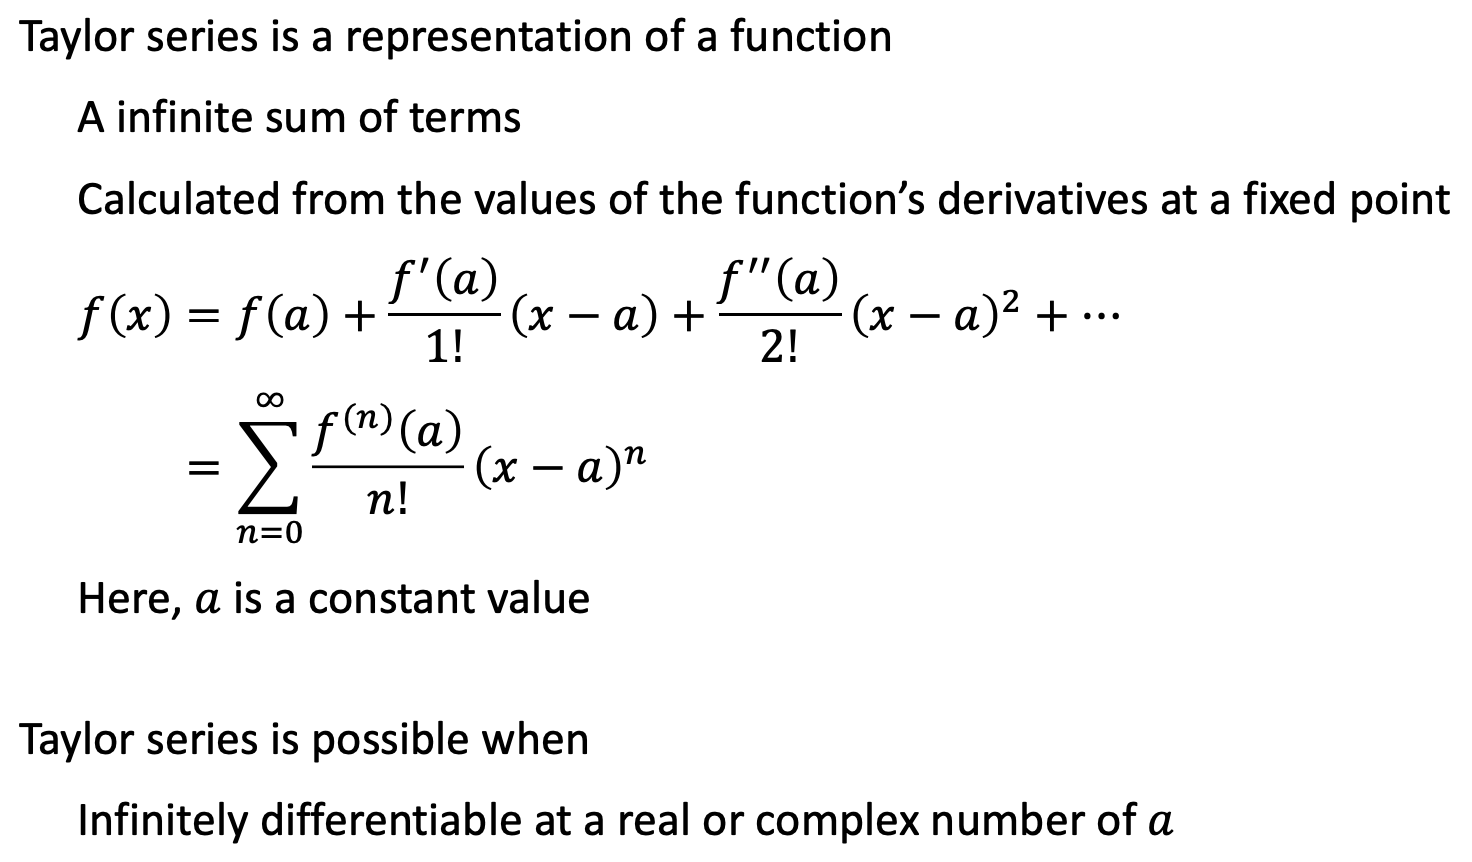

In [70]:
from math import factorial, exp

a = x1 = 0

def taylor(x, N=1):
  f = exp
  result = 0.0
  for n in range(N):
    result += f(a)/factorial(n)*(x-a)**n
  return result

In [71]:
X = [1,2,3,4,5]
Y = [exp(x) for x in X]
Y1 = [taylor(x, 1) for x in X]
Y2 = [taylor(x, 2) for x in X]
Y3 = [taylor(x, 3) for x in X]
Y4 = [taylor(x, 4) for x in X]
Y5 = [taylor(x, 10) for x in X]

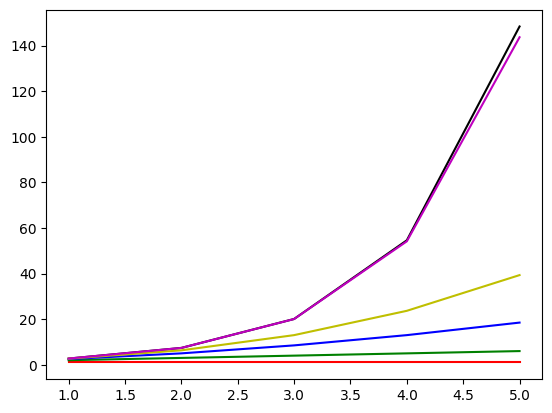

In [72]:
plt.plot(X,Y, c='k') # 원본
plt.plot(X,Y1, c='r')
plt.plot(X,Y2, c='g')
plt.plot(X,Y3, c='b')
plt.plot(X,Y4, c='y')
plt.plot(X,Y5, c='m')

In [73]:
Y1

[1.0, 1.0, 1.0, 1.0, 1.0]

## Gradient Descent/Ascent(경사 하강/상승법)

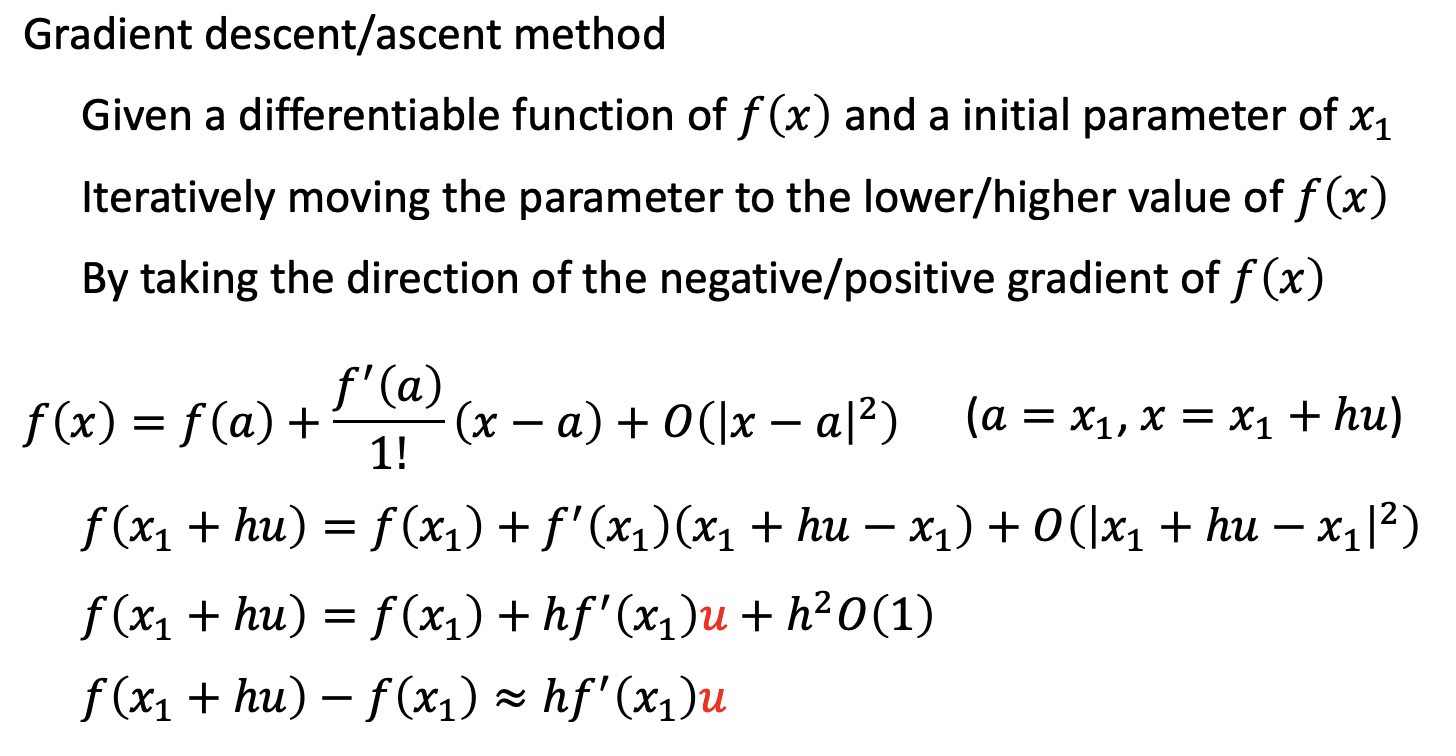

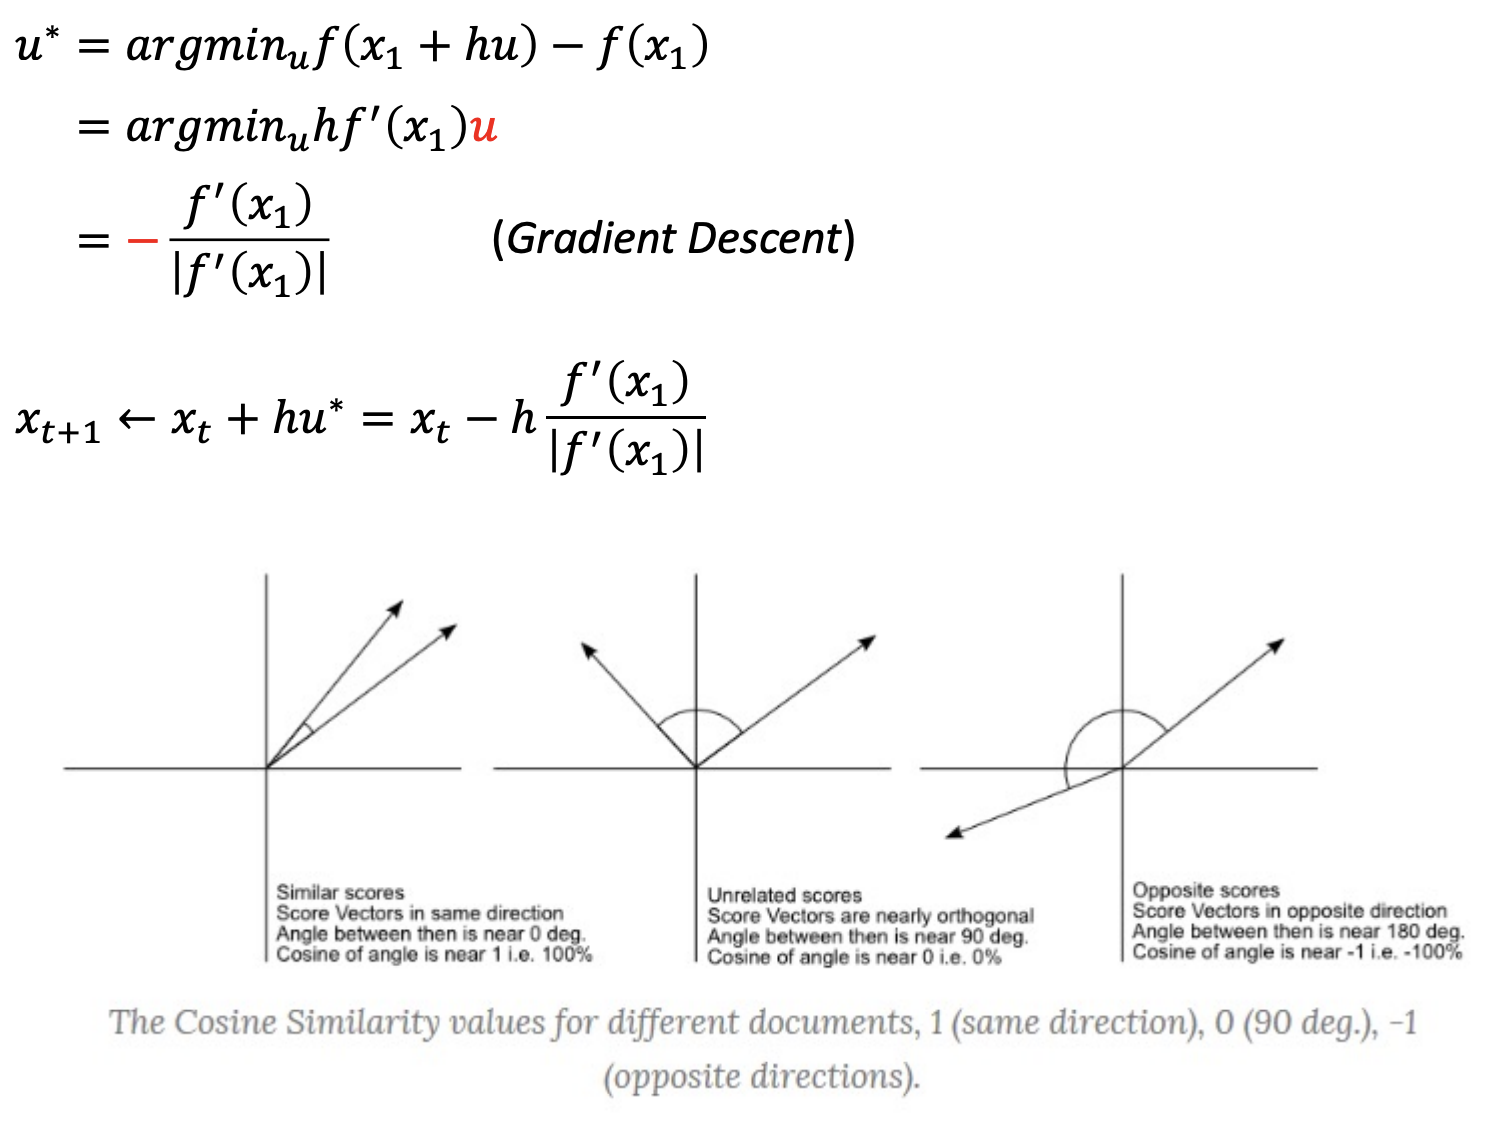

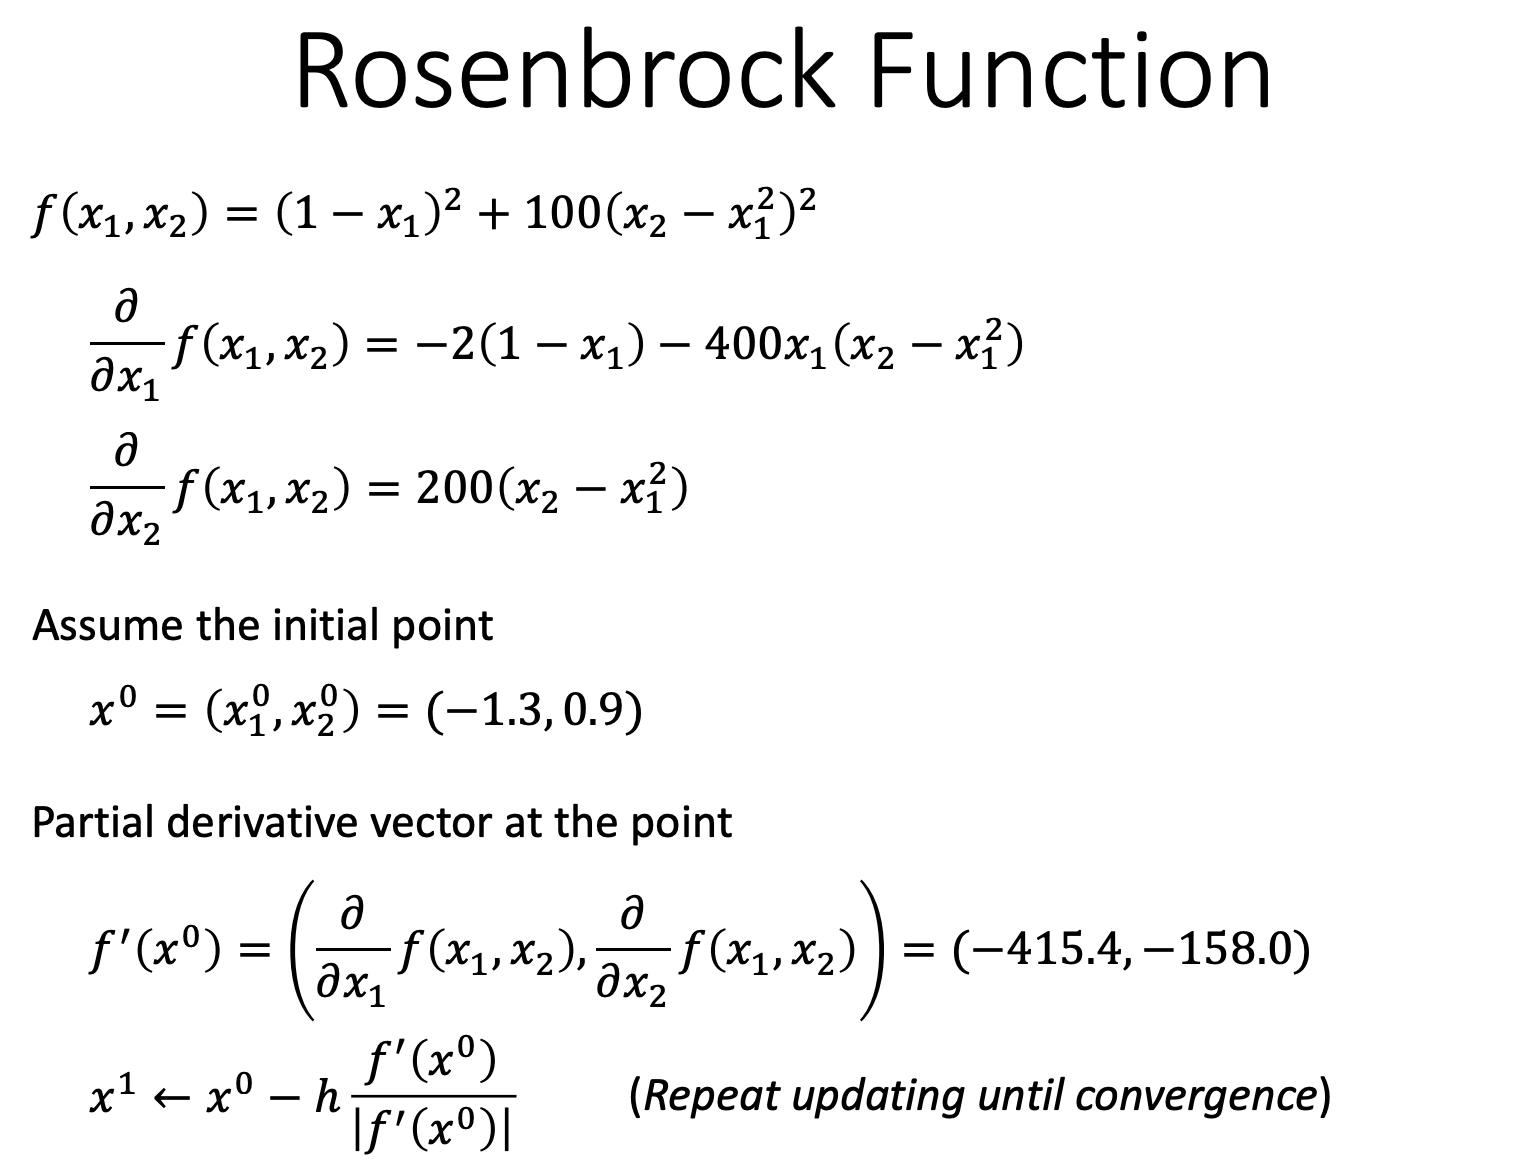

In [74]:
f = lambda x1, x2: (1-x1)**2 + 100*(x2-x1**2)**2
dx1 = lambda x1, x2: -2*(1-x1) -400*x1*(x2-x1**2)
dx2 = lambda x1, x2: 200*(x2-x1**2)

In [75]:
a = x0 = (-1.3, 0.9)

In [80]:
from math import sqrt

h = 1e-5
epoch = 100000
history1 = list()
history2 = list()

a = x0 = (-1.3, 0.9)

for i in range(epoch):
    dx = (dx1(*x0), dx2(*x0))
    vl = sqrt(dx[0]**2+dx[1]**2)
    u = (dx[0]/vl, dx[1]/vl)
    x1 = (x0[0]-u[0]*h, x0[1]-u[1]*h) # Gradient Descent
    history1.append(f(*x0) - f(*x1)) # => absolute
    history2.append((f(*x0) - f(*x1))**2)
    x0 = x1

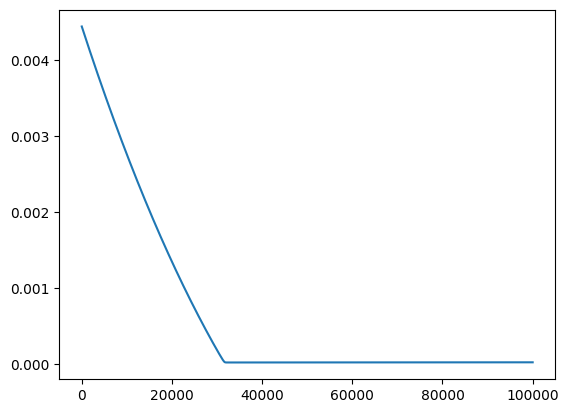

In [87]:
plt.plot(history1)


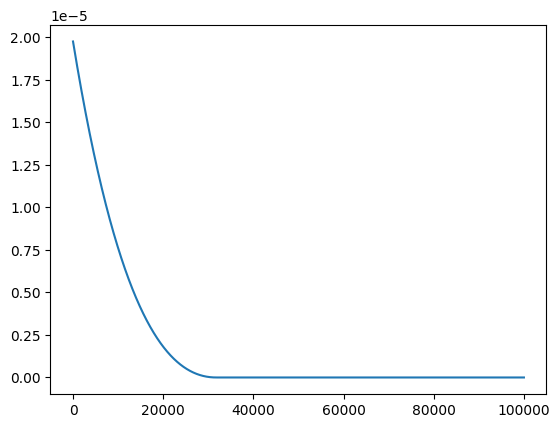

In [88]:
plt.plot(history2)